# **Domain Analysis**
---

### Business Case: Texas Salary Prediction

* The Texas state government employs a workforce across multiple agencies, roles, and employment statuses. Accurately predicting employee salaries is essential for budgeting, equity analysis, and operational efficiency. The dataset includes key attributes such as agency, class title, ethnicity, gender, hours worked, and multiple-job roles, offering a rich basis for building predictive models.


### Feature Information
- **AGENCY**:- it represents government agency to which the employee belongs.
- **AGENCY NAME** :- The name of the agency.
- **LAST NAME** :- The employee's last name.
- **FIRST NAME** :- The employee's first name.
- **MI** :- The employee's middle initial.
- **CLASS CODE** :- A code that represents the job classification or role of the employee.
- **CLASS TITLE** :- The job title or position.
- **ETHNICITY** :- The employee's ethnicity.
- **GENDER** :- The employee's gender like Male or Female.
- **STATUS** :- The employment status of the employee like full-time,part-time,regular and temporary.
- **EMPLOY DATE**:- The employee's employment start date.
- **HRLY RAT** :- The hourly pay of the employee.
- **HRS PER WK** :- The number of hours the employee works per week.
- **MONTHLY** :- The monthly earnings of the employee.
- **ANNUAL** :- The annual salary of the employee.
- **STATE NUMBER**:- It representing the state or geographical region the employee is located in.
- **DUPLICATED** :- Indicates whether the row is a duplicate.
- **MULTIPLE FULL-TIME JOBS** :- This likely indicates if the employee holds more than one full-time job.
- **COMBINED MULTIPLE JOBS** :- A combined value indicating an employee has multiple jobs.
- **summed_annual_salary** :- The total annual salary when multiple job positions are combined.
- **HIDE FROM SEARCH** :- The employee’s information should be hidden from search results.

---



In [153]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings to avoid cluttering the output
warnings.filterwarnings('ignore')

In [154]:
# Set pandas option to display all columns
pd.set_option('display.max_columns',None)

In [155]:
# Load the dataset from a CSV file
data = pd.read_csv('salary.csv')
data       # Display the entire dataset

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


---
# **Basic Check**
---

In [157]:
# Check the shape of the dataset (rows, columns)
data.shape

(149481, 21)

In [158]:
# Show the first five rows of the dataset
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [159]:
# Show the last five rows of the dataset
data.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [162]:
# Get summary statistics of the dataset (mean, min, max, etc.)
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [163]:
# Get summary statistics of Categorical
data.describe(include='O')

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [165]:
# Display information about the dataset (data types, non-null counts, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [169]:
# Display the entire dataset
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [170]:
# Check the shape of the dataset (rows, columns)
data.shape

(149481, 21)

In [172]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

---
# **Exploratory Data Analysis (EDA)**:
---

## Unnivariate Analysis

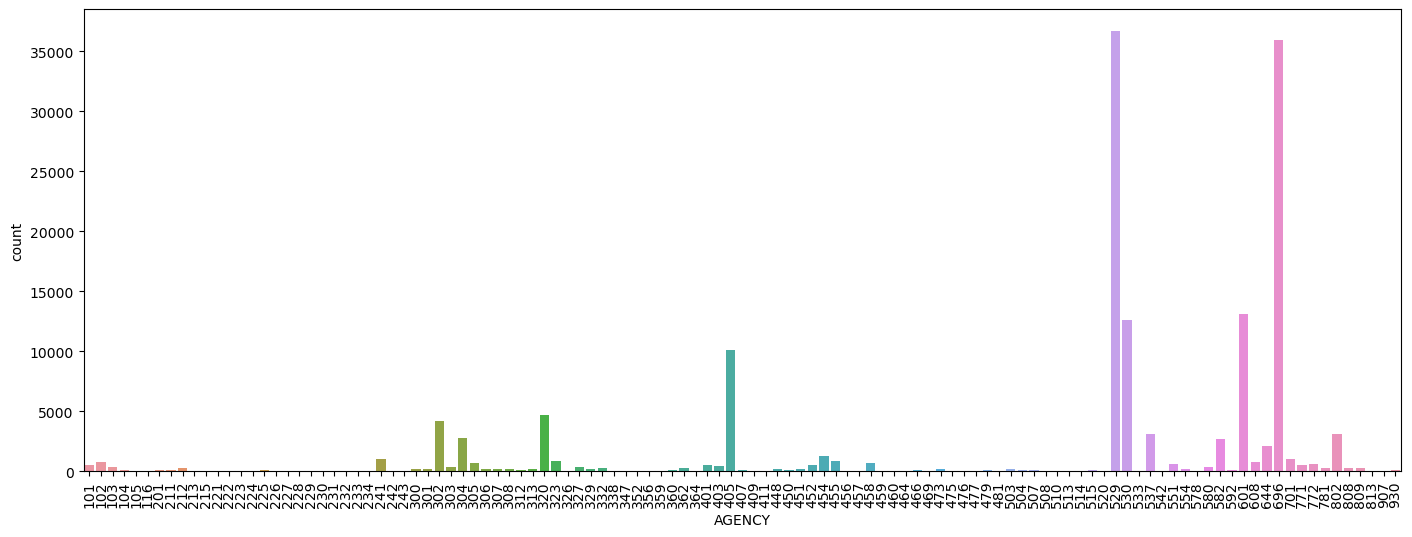

In [19]:
# Set figure size and create a count plot for 'AGENCY' column
plt.figure(figsize=(17,6))
sns.countplot(x = data.AGENCY)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### insights

* The count of entries varies significantly across different agencies.
* A few agencies dominate the count, with two specific agencies having counts above 30,000, while most other agencies have considerably lower counts.

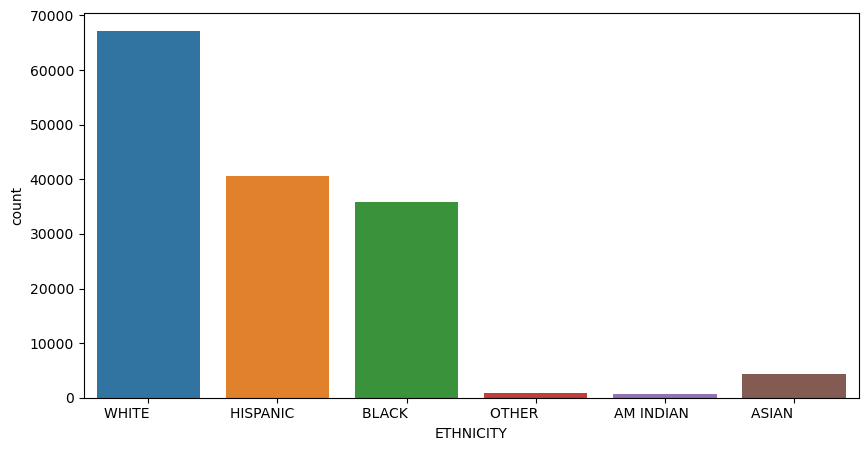

In [21]:
# Set figure size and create a count plot for 'ETHNICITY' column
plt.figure(figsize=(10,5))
sns.countplot(x = data['ETHNICITY'])
plt.show()

### insights

* The majority of individuals belong to the "WHITE" ethnicity, followed by "HISPANIC" and "BLACK."
* Ethnic groups such as "OTHER," "AM INDIAN," and "ASIAN" have considerably lower counts.


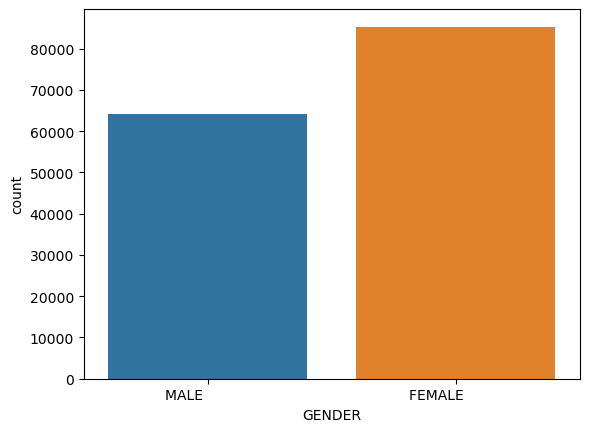

In [23]:
# Create a count plot for 'GENDER' column
sns.countplot(x = data['GENDER'])
plt.show()

### insight
* The dataset shows a higher representation of females compared to males.

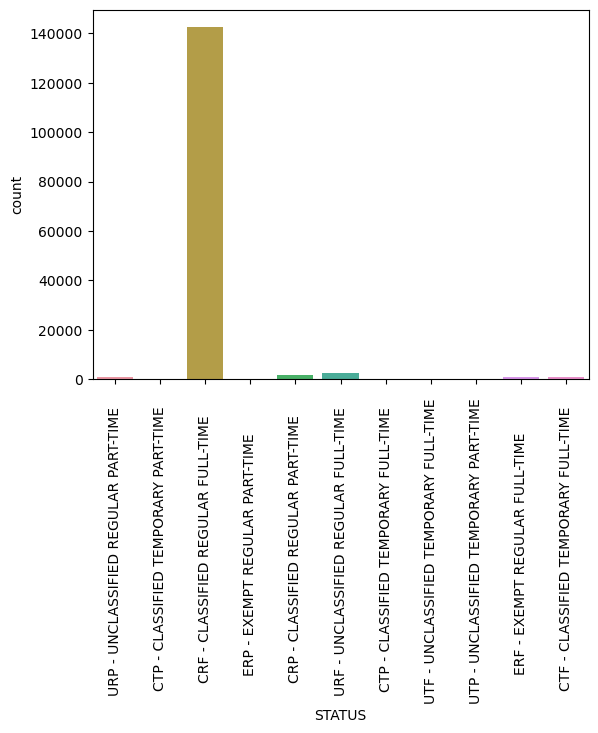

In [145]:
# Create a count plot for 'STATUS' column
sns.countplot(x = data['STATUS'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### insights

* The graph shows a strong preference for classified, regular, full-time employment, dominating all other employment types. Part-time, temporary, and unclassified positions are minimally represented, indicating a focus on long-term, structured roles.



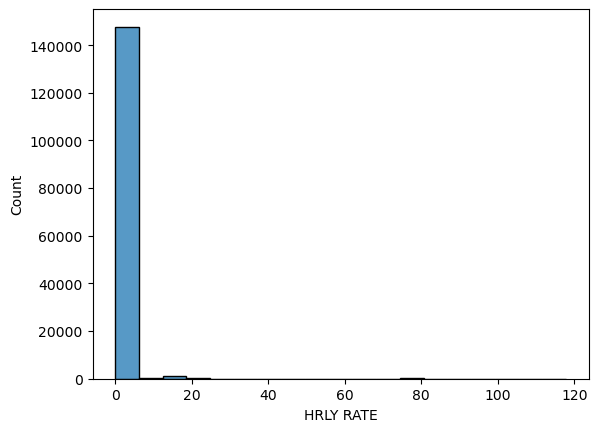

In [146]:
# Create a histogram for 'HRLY RATE' column to visualize hourly rate distribution
sns.histplot(data['HRLY RATE'])
plt.show()

### insights

* The histogram reveals a massive concentration of hourly rates at the low end, indicating limited variability and a strong skew towards lower pay or prices. Potential outliers exist at higher rates, but they are infrequent compared to the dominant low-rate cluster.

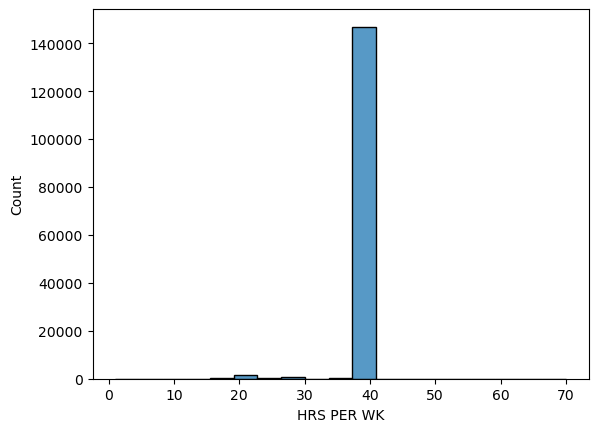

In [153]:
# Create a histogram for 'HRS PER WK' column to visualize hours per week distribution
sns.histplot(data['HRS PER WK'])
plt.show()

### insight 
* The histogram reveals a dominant 40-hour work week, suggesting a standard full-time employment pattern.  However, a long tail indicates some individuals work significantly more hours, hinting at potential overwork.  The concentration at 40 hours also implies limited variability in work hours for the majority.

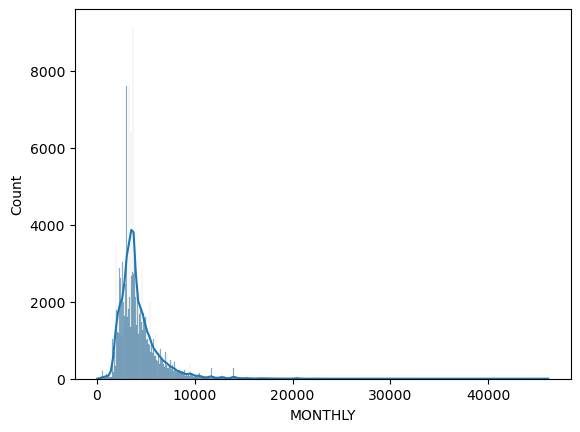

In [155]:
# Create a histogram for 'MONTHLY' column with Kernel Density Estimation (KDE) 
# to visualize the distribution of monthly earnings
sns.histplot(data['MONTHLY'], kde=True)
plt.show()

## insights

* The distribution of the "MONTHLY" variable is highly right-skewed, indicating that most values are concentrated on the lower end, with a long tail stretching towards higher values.
* The majority of the data points are below 10,000, and very few observations are present beyond 20,000.
* This suggests that a large proportion of individuals or entities have relatively low monthly values, with only a small number having extremely high values.


### All columns insights

* since LAST NAME, FIRST NAME and MI columns are unnecessary features to predict salary, we are not considering those features for exploratory data analysis.

* AGENCY : Average number of employees are from agency 500 and 700

* AGENCY_NAME : HEALTH AND HUMAN SERVICES COMMISSION and TEXAS DEPARTMENT OF CRIMINAL JUSTICE agencies have most of the employees.

* CLASS CODE : 4504, 4504, 4503, 5622, 5121 is the class code that most of the employee have.

* ETHNICITY : white, hispanic, black people are more in no.

* GENDER : Female employees are more in count.

* STATUS : Average employees are belongs to CLASSIFIED REGULAR FULL-TIME status.

* HRS PER WEEK : maximum hrs per week is 40

* MONTHLY : avrage monthly salary is around 3000

* ANNAUL : Average annual income of employees is 35000 to 45000.

* Since DUPLICATED, MULTIPLE FULL TIME JOBS, COMBINED MULTIPLE JOBS, SUMMED ANNUAL SALARY, HIDE FROM SEARCH having missing values greater than 99% we are not taking this for EDA.

## Bivariate Analysis

In [158]:
# Select relevant columns for bi-variate analysis
bi_dt1 = data[['AGENCY','CLASS CODE','HRLY RATE','HRS PER WK','MONTHLY','STATE NUMBER','multiple_full_time_jobs','summed_annual_salary']]

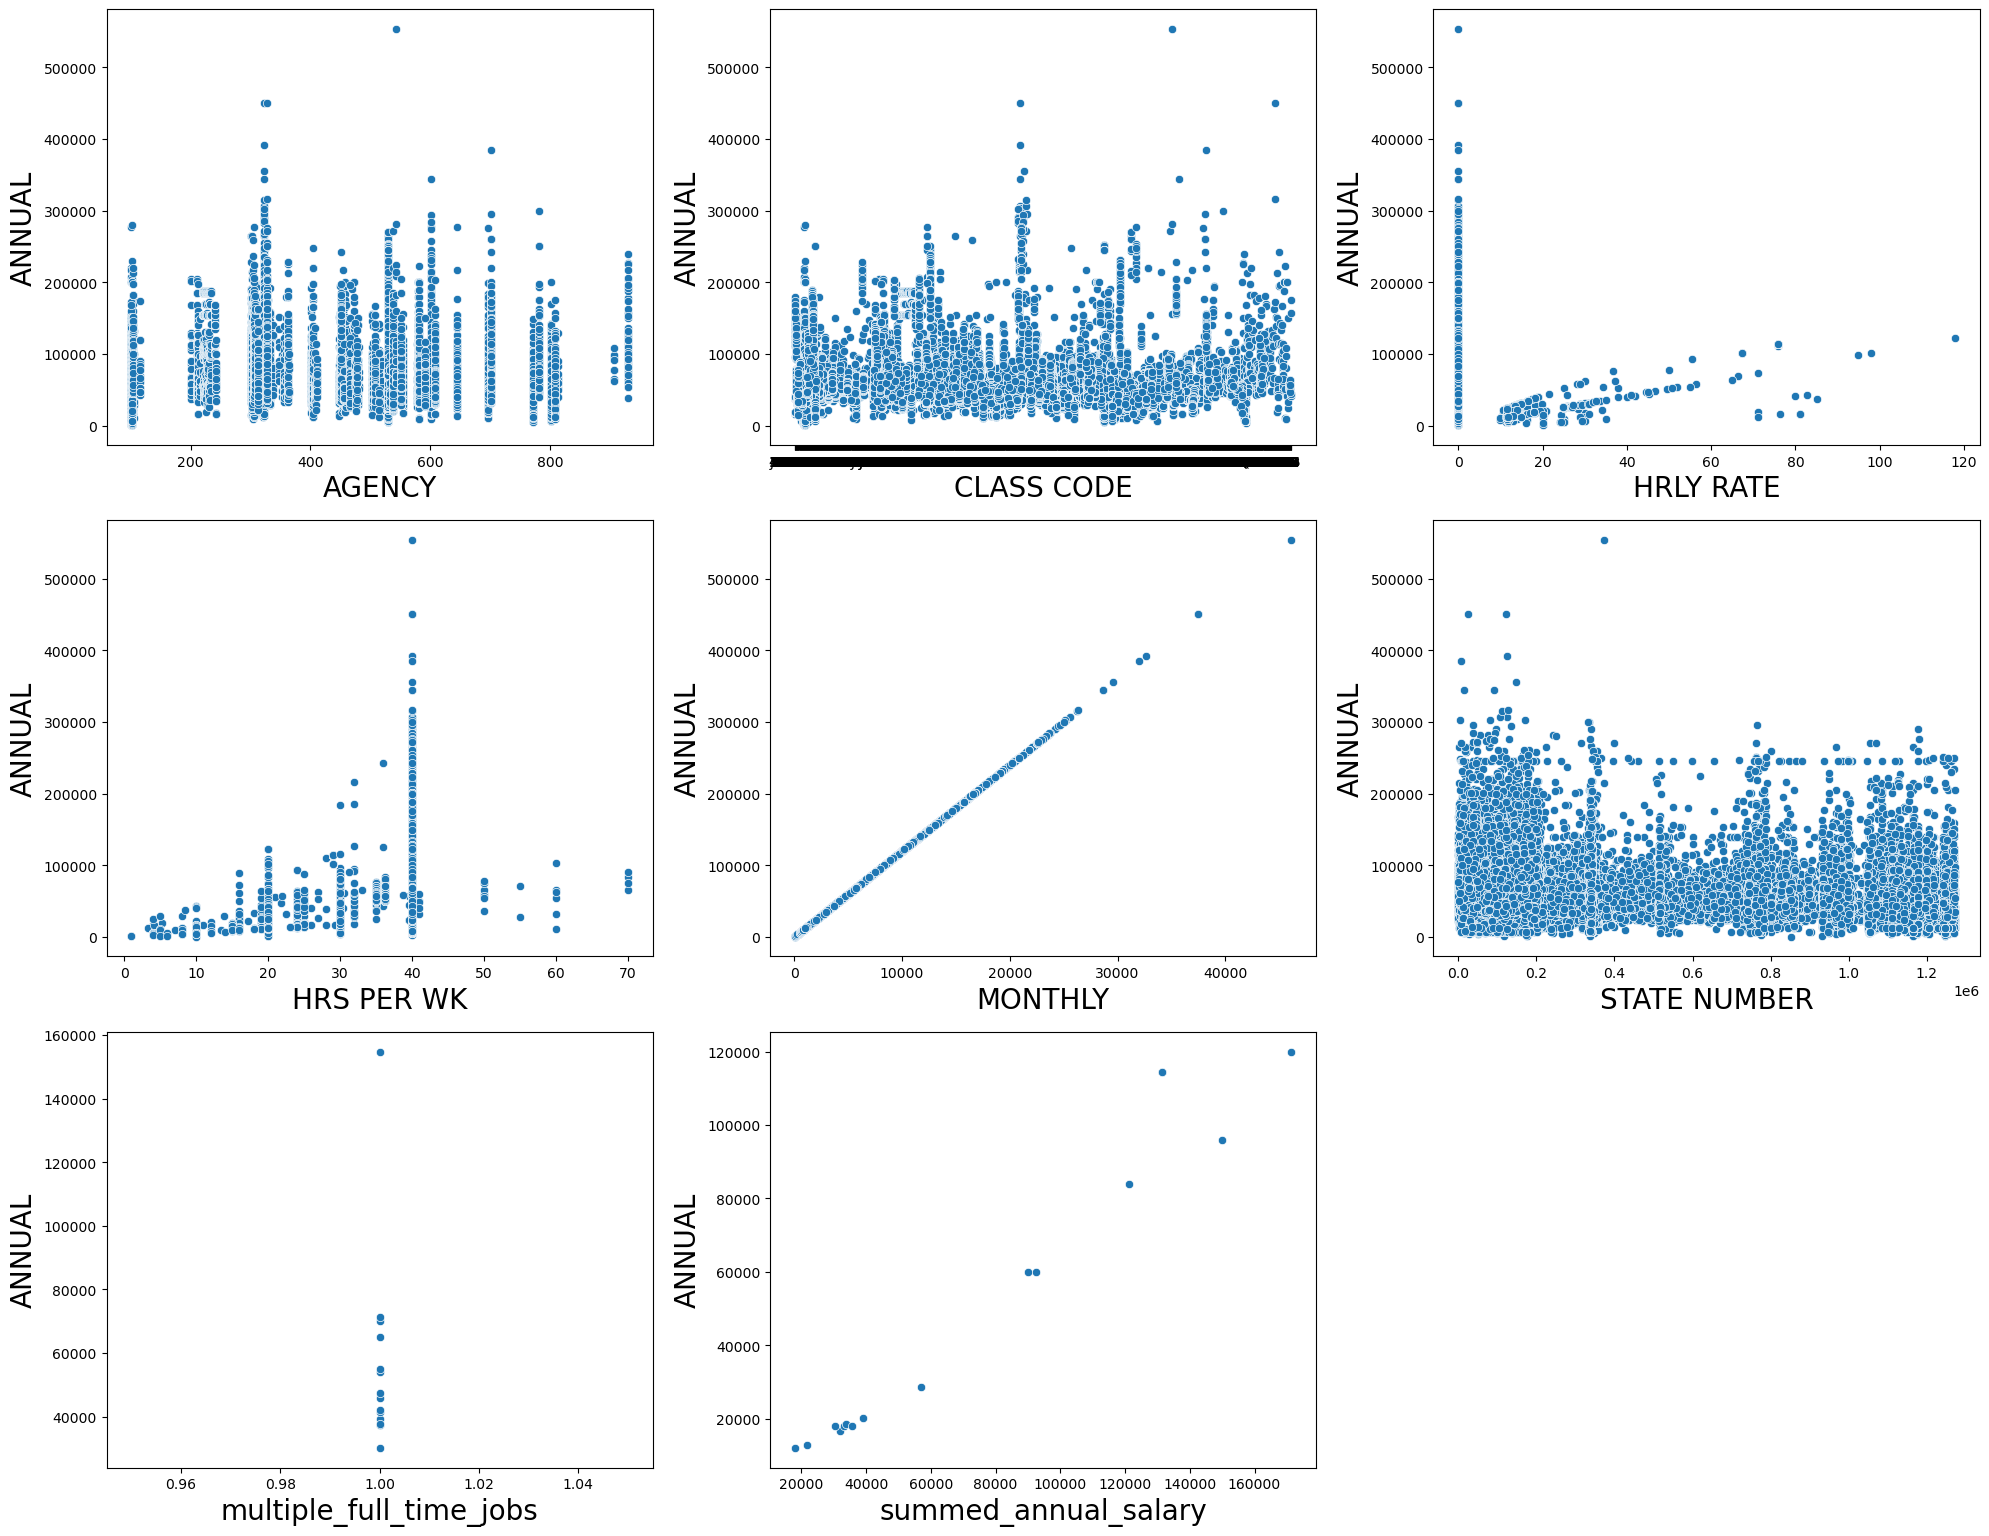

In [159]:
# Set figure size for better visualization
plt.figure(figsize=(20,20))
num = 1

# Loop through each selected column to create scatter plots against 'ANNUAL' salary
for i in bi_dt1:    # Iterate over column names
    if num < 11:    # Ensure we don't exceed the subplot limit
        plt.subplot(4,3, num)  # Create subplots in a 3x4 grid
        sns.scatterplot(x=data[i],y = data['ANNUAL'])  # Scatter plot for relationship visualization
        plt.xlabel(i,fontsize=20)
        plt.ylabel('ANNUAL',fontsize=20)
    num += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [43]:
# Select categorical columns for bi-variate analysis
bi_dt2=data[['ETHNICITY','GENDER','STATUS']]

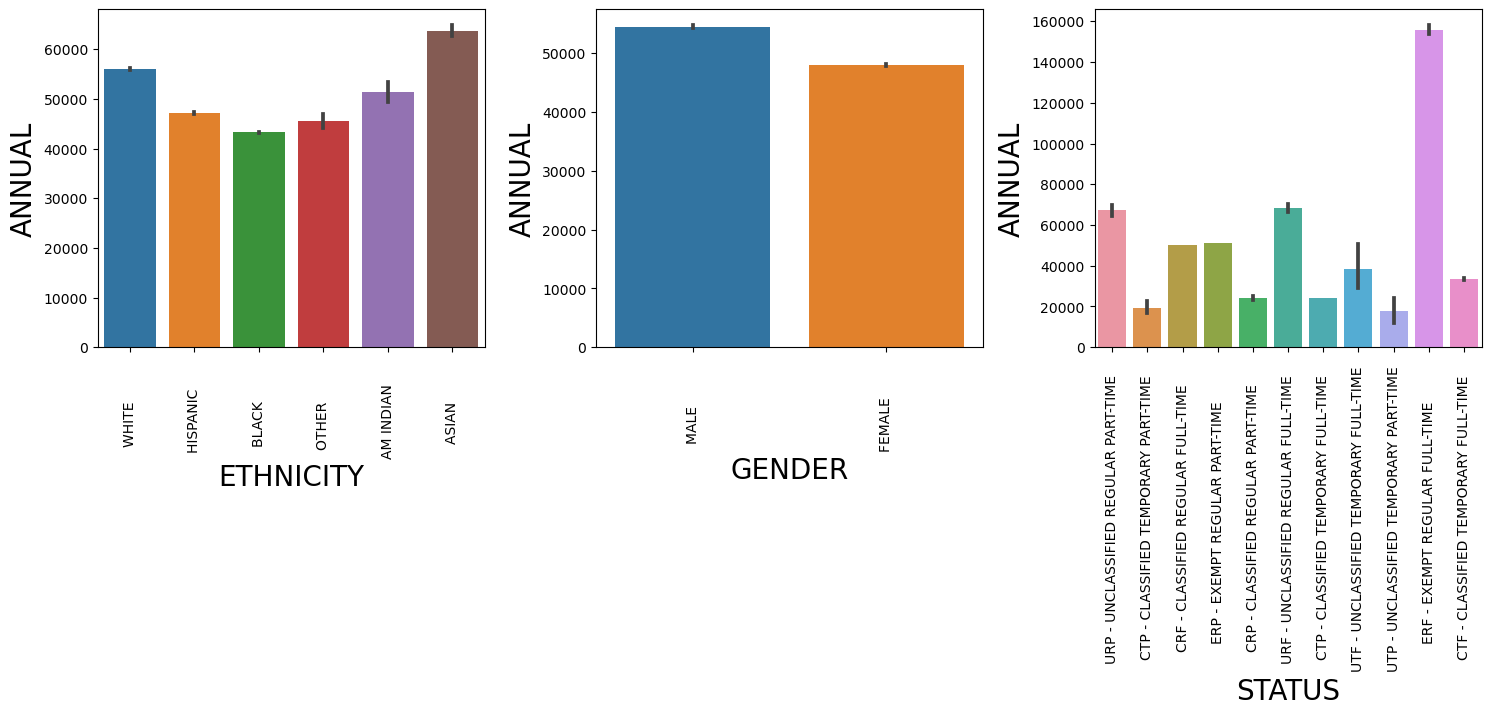

In [47]:
# Set figure size and background color
plt.figure(figsize=(20,25), facecolor='white')
num = 1

# Loop through each categorical column to create scatter plots against 'ANNUAL' salary
for column in bi_dt2:
    if num<=16 :
        plt.subplot(4,4,num)  # Arrange subplots in a 4x4 grid
        sns.barplot(x=data[column],y=data.ANNUAL)  # Scatter plot for categorical analysis
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.ylabel('ANNUAL',fontsize=20)
    num+=1
    
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## 2) Bivariate Analysis EDA Report :-

#### 1. **Annual Salary Distribution by Ethnicity**
   - Asian individuals have the highest annual salary among the ethnic groups.
   - White individuals also earn a relatively high salary.
   - Hispanic, Black, and Other ethnic groups have slightly lower salaries.
   - American Indian individuals earn slightly more than Black and Hispanic groups but less than White and Asian groups.

#### 2. **Annual Salary Distribution by Gender**
   - Males earn a higher annual salary than females.
   - The gender pay gap is evident, with males earning significantly more than females.

#### 3. **Annual Salary Distribution by Employment Status**
   - There is a significant variation in salaries based on employment status.
   - Some employment categories (like "TEMPORARY FULL-TIME") show exceptionally high salaries compared to others.
   - Certain categories, such as "REGULAR PART-TIME" and "TEMPORARY PART-TIME," have much lower annual salaries.
   - "CLASSIFIED REGULAR FULL-TIME" and similar categories tend to have mid-range salaries.

---
## ● Who are the outliers in the salaries?

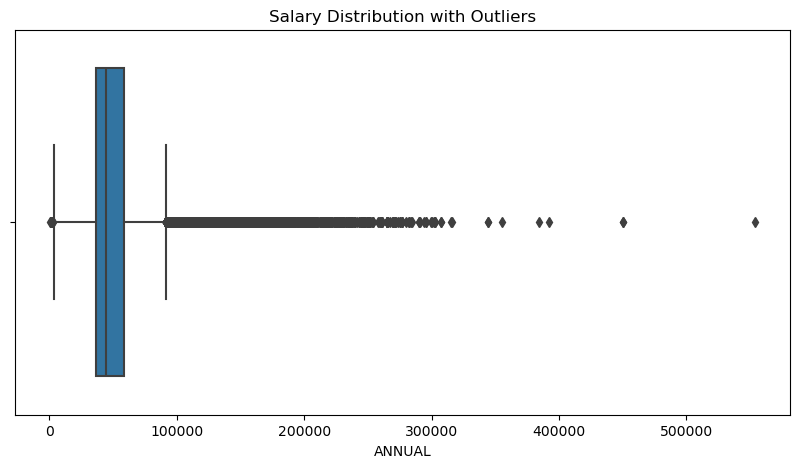

Outlier Salaries:
                                              CLASS TITLE     ANNUAL
83851   CHIEF SCIENTIFIC OFFICER                      ...  553500.00
14793   CHIEF INVESTMENT OFFICER                      ...  450000.00
144232  DIRECTOR OF INVESTMENTS                       ...  450000.00
15154   SENIOR MANAGING DIRECTOR                      ...  391999.92
136727  PSF CHIEF INVESTMENT OFFICER                  ...  384375.00
...                                                   ...        ...
142311  ELECTED OFFICIALS STAFF                       ...    1200.00
142114  ELECTED OFFICIALS STAFF                       ...    1200.00
141394  LEG. SERVICE/MAINTENANCE                      ...    1039.92
141415  LEG. SERVICE/MAINTENANCE                      ...    1039.92
142067  ELECTED OFFICIALS STAFF                       ...     600.00

[9031 rows x 2 columns]


In [300]:
# Detect outliers using Interquartile Range (IQR)
Q1 = data["ANNUAL"].quantile(0.25)
Q3 = data["ANNUAL"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data["ANNUAL"] < lower_bound) | (data["ANNUAL"] > upper_bound)]

# Plot salary distribution with outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=data["ANNUAL"])
plt.title("Salary Distribution with Outliers")
plt.show()

# Display outliers
print("Outlier Salaries:")
print(outliers[["CLASS TITLE", "ANNUAL"]].sort_values(by="ANNUAL", ascending=False))

---
# **Feature Engineering:**
---

## 1) Data Preprocessing

In [33]:
# Display the entire dataset
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [35]:
# Check for missing values in the dataset
data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [37]:
# Drop unnecessary columns from the dataset
data.drop(columns=['AGENCY NAME','LAST NAME', 'FIRST NAME', 'MI', 'CLASS TITLE', 'EMPLOY DATE', 'STATE NUMBER', 'duplicated', 'multiple_full_time_jobs',
                   'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search'], inplace=True)

In [39]:
# Display modified dataset
data

,AGENCY,CLASS CODE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL
0,241,JD25,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84
1,212,3524,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24
2,241,JD25,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84
3,212,3524,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24
4,696,4504,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...
149476,809,6232,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,2899.00,34788.00
149477,809,0302,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5500.00,66000.00
149478,809,0130,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,12.93000,20.0,1120.60,13447.20
149479,809,1572,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5744.16,68929.92


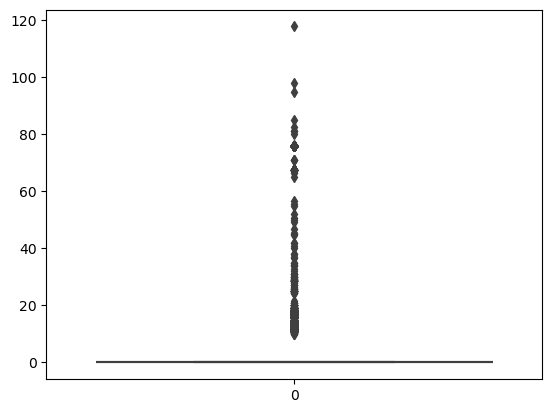

In [41]:
# Box plot to visualize distribution and outliers in 'HRLY RATE'
sns.boxplot(data['HRLY RATE'])
plt.show()

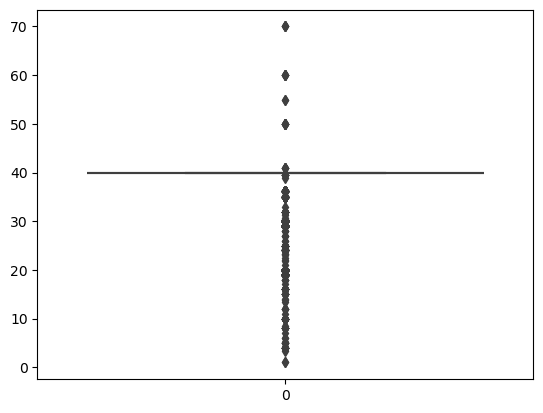

In [43]:
# Box plot for 'HRS PER WK'
sns.boxplot(data['HRS PER WK'])
plt.show()

### Encoding

In [188]:
# Display the entire dataset
data

,AGENCY,CLASS CODE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL
0,241,JD25,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84
1,212,3524,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24
2,241,JD25,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84
3,212,3524,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24
4,696,4504,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...
149476,809,6232,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,2899.00,34788.00
149477,809,0302,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5500.00,66000.00
149478,809,0130,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,12.93000,20.0,1120.60,13447.20
149479,809,1572,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,5744.16,68929.92


In [189]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

In [190]:
# Encode 'ETHNICITY' using Label Encoding
data['ETHNICITY'] = le.fit_transform(data['ETHNICITY'])

In [191]:
# Encode 'STATUS' using Label Encoding
data['STATUS'] = le.fit_transform(data['STATUS'])

In [192]:
# Encode 'CLASS CODE' using Label Encoding
data['CLASS CODE'] = le.fit_transform(data['CLASS CODE'])

In [193]:
# Perform One-Hot Encoding for 'GENDER' column
ohe_GENDER = pd.get_dummies(data['GENDER']).astype('int')

# Concatenate one-hot encoded 'GENDER' columns with original dataset
data1 = pd.concat([data,ohe_GENDER],axis=1)

In [194]:
# Drop the original 'GENDER' column after encoding
data1.drop(['GENDER'],axis=1,inplace=True)

In [195]:
# Display modified dataset
data1

,AGENCY,CLASS CODE,ETHNICITY,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,FEMALE,MALE
0,241,1409,5,8,75.96150,29.0,9545.82,114549.84,0,1
1,212,616,5,4,81.04454,4.0,1404.77,16857.24,0,1
2,241,1409,5,8,75.96150,29.0,9545.82,114549.84,0,1
3,212,616,5,4,81.04453,4.0,1404.77,16857.24,0,1
4,696,810,3,0,0.00000,40.0,3284.27,39411.24,1,0
...,...,...,...,...,...,...,...,...,...,...
149476,809,1042,5,0,0.00000,40.0,2899.00,34788.00,0,1
149477,809,84,5,0,0.00000,40.0,5500.00,66000.00,1,0
149478,809,4,5,1,12.93000,20.0,1120.60,13447.20,0,1
149479,809,278,5,0,0.00000,40.0,5744.16,68929.92,0,1


## 2) Feature selection

In [199]:
# Compute the correlation matrix of the dataset
data1.corr()

,AGENCY,CLASS CODE,ETHNICITY,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,FEMALE,MALE
AGENCY,1.000000,0.068594,-0.034903,-0.276853,-0.083653,-0.013847,-0.266452,-0.266452,-0.093244,0.093244
CLASS CODE,0.068594,1.000000,-0.056818,0.225200,0.091614,-0.068355,-0.074360,-0.074360,-0.127360,0.127360
ETHNICITY,-0.034903,-0.056818,1.000000,0.090649,0.051916,-0.023782,0.170107,0.170107,-0.106739,0.106739
STATUS,-0.276853,0.225200,0.090649,1.000000,0.388160,-0.306624,0.183917,0.183917,-0.033160,0.033160
HRLY RATE,-0.083653,0.091614,0.051916,0.388160,1.000000,-0.337784,0.086291,0.086291,-0.041537,0.041537
HRS PER WK,-0.013847,-0.068355,-0.023782,-0.306624,-0.337784,1.000000,0.096041,0.096041,-0.001952,0.001952
MONTHLY,-0.266452,-0.074360,0.170107,0.183917,0.086291,0.096041,1.000000,1.000000,-0.129265,0.129265
ANNUAL,-0.266452,-0.074360,0.170107,0.183917,0.086291,0.096041,1.000000,1.000000,-0.129265,0.129265
FEMALE,-0.093244,-0.127360,-0.106739,-0.033160,-0.041537,-0.001952,-0.129265,-0.129265,1.000000,-1.000000
MALE,0.093244,0.127360,0.106739,0.033160,0.041537,0.001952,0.129265,0.129265,-1.000000,1.000000


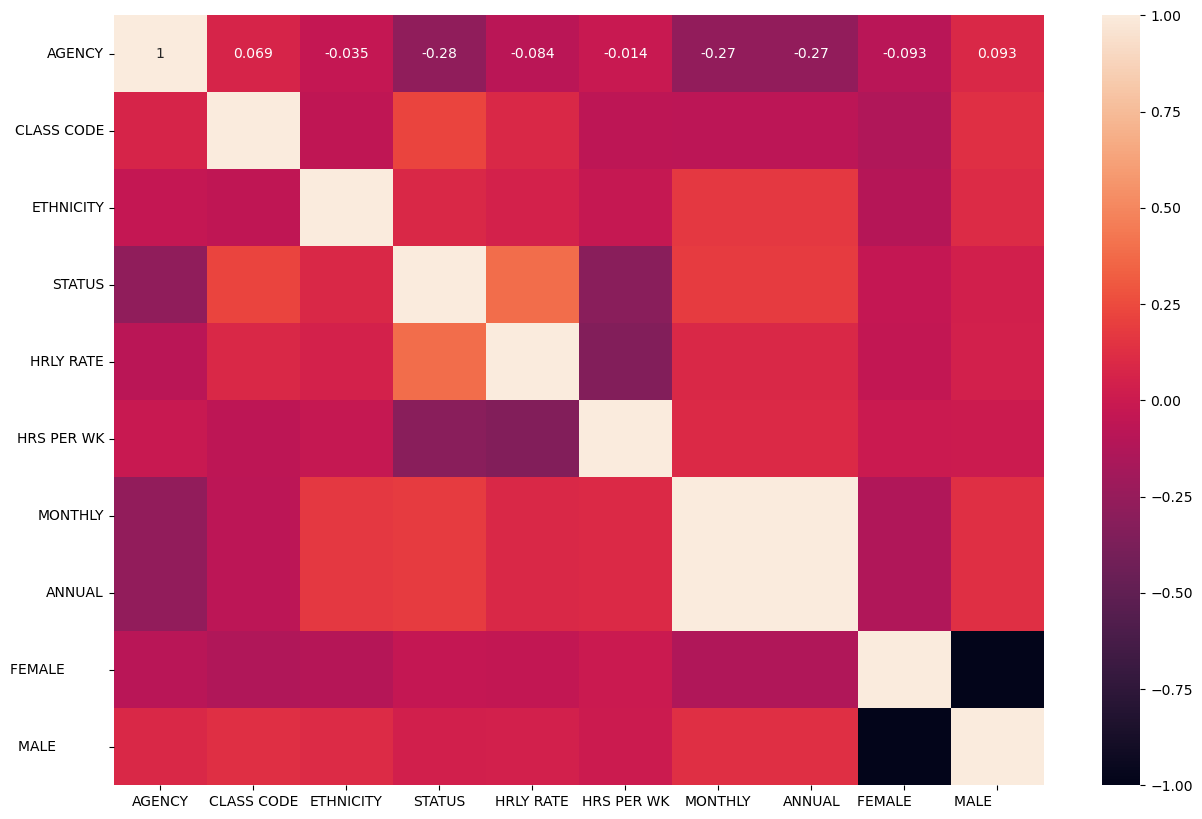

In [200]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data1.corr(),annot=True)  # Annotate with correlation values
plt.show()

---
# **Model Creation:** 
---

## 1) Independent and Dependent Variable Creation

In [203]:
# Separate features (x) and target variable (y)
x = data1.drop('ANNUAL',axis=1)  # Drop 'class' column to keep only features
y = data1['ANNUAL']  # Store target variable

In [204]:
x   # Display the feature set

,AGENCY,CLASS CODE,ETHNICITY,STATUS,HRLY RATE,HRS PER WK,MONTHLY,FEMALE,MALE
0,241,1409,5,8,75.96150,29.0,9545.82,0,1
1,212,616,5,4,81.04454,4.0,1404.77,0,1
2,241,1409,5,8,75.96150,29.0,9545.82,0,1
3,212,616,5,4,81.04453,4.0,1404.77,0,1
4,696,810,3,0,0.00000,40.0,3284.27,1,0
...,...,...,...,...,...,...,...,...,...
149476,809,1042,5,0,0.00000,40.0,2899.00,0,1
149477,809,84,5,0,0.00000,40.0,5500.00,1,0
149478,809,4,5,1,12.93000,20.0,1120.60,0,1
149479,809,278,5,0,0.00000,40.0,5744.16,0,1


In [205]:
y   # Display the target variable

0         114549.84
1          16857.24
2         114549.84
3          16857.24
4          39411.24
            ...    
149476     34788.00
149477     66000.00
149478     13447.20
149479     68929.92
149480     12209.52
Name: ANNUAL, Length: 149481, dtype: float64

## 2) Traning and Testing Data Creation

In [207]:
# Import train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [208]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=23)

In [209]:
x_train   # Display the train feature set

,AGENCY,CLASS CODE,ETHNICITY,STATUS,HRLY RATE,HRS PER WK,MONTHLY,FEMALE,MALE
142952,303,274,1,0,0.0,40.0,7680.82,0,1
77752,530,880,3,0,0.0,40.0,4618.15,1,0
120441,696,811,2,0,0.0,40.0,3720.17,1,0
72445,530,279,2,0,0.0,40.0,4594.74,1,0
67688,529,292,5,0,0.0,40.0,5406.95,0,1
...,...,...,...,...,...,...,...,...,...
9704,306,322,3,0,0.0,40.0,6640.00,1,0
76726,530,294,5,0,0.0,40.0,6837.45,1,0
9256,304,156,5,0,0.0,40.0,6600.00,0,1
127718,696,811,2,0,0.0,40.0,3720.17,0,1


In [210]:
x_test   # Display the test feature set

,AGENCY,CLASS CODE,ETHNICITY,STATUS,HRLY RATE,HRS PER WK,MONTHLY,FEMALE,MALE
70083,530,878,4,0,0.0,40.0,3816.65,1,0
130972,696,811,5,0,0.0,40.0,3720.17,0,1
80311,530,879,5,0,0.0,40.0,4198.32,1,0
34252,529,993,5,0,0.0,40.0,2632.29,1,0
124582,696,809,2,0,0.0,40.0,3019.84,0,1
...,...,...,...,...,...,...,...,...,...
125330,696,809,5,0,0.0,40.0,3019.84,0,1
65798,529,997,5,0,0.0,40.0,3520.33,1,0
8071,304,280,2,0,0.0,40.0,5253.00,1,0
91438,601,437,5,0,0.0,40.0,5280.25,0,1


In [211]:
y_train   # Display the train target variable

142952    92169.84
77752     55417.80
120441    44642.04
72445     55136.88
67688     64883.40
            ...   
9704      79680.00
76726     82049.40
9256      79200.00
127718    44642.04
107091    36238.08
Name: ANNUAL, Length: 112110, dtype: float64

In [212]:
y_test   # Display the test target variable

70083     45799.80
130972    44642.04
80311     50379.84
34252     31587.48
124582    36238.08
            ...   
125330    36238.08
65798     42243.96
8071      63036.00
91438     63363.00
31304     33999.96
Name: ANNUAL, Length: 37371, dtype: float64

## 3) Model Selection

### * **Linear Regression**

In [215]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression

# Initialize and train Linear Regression model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [216]:
# Predict on test data
y_pred1 = lr.predict(x_test)
y_pred1  # Display test predictions

array([45799.8 , 44642.04, 50379.84, ..., 63036.  , 63363.  , 33999.96])

In [217]:
# Predict on training data
y_train_pred1 = lr.predict(x_train)
y_train_pred1  # Display training predictions

array([92169.84, 55417.8 , 44642.04, ..., 79200.  , 44642.04, 36238.08])

### * **K-Nearest Neighbor**

In [219]:
# Import K-Nearest Neighbor Model
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train K-Nearest Neighbor model
knnr = KNeighborsRegressor()
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [220]:
# Predict on test data
y_pred2 = knnr.predict(x_test)
y_pred2  # Display test predictions

array([45799.8  , 44642.04 , 50379.84 , ..., 63000.   , 63300.552,
       34005.936])

In [221]:
# Predict on training data
y_train_pred2 = knnr.predict(x_train)
y_train_pred2  # Display training predictions

array([92170.896, 55417.8  , 44642.04 , ..., 79105.296, 44642.04 ,
       36238.08 ])

### * **Decision Tree**

In [223]:
# Import Decision Tree Model
from sklearn.tree import DecisionTreeRegressor

# Initialize and train Decision Tree model
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [224]:
# Predict on test data
y_pred3 = dtr.predict(x_test)
y_pred3  # Display test predictions

array([45799.8 , 44642.04, 50379.84, ..., 63036.48, 63365.28, 33999.96])

In [225]:
# Predict on training data
y_train_pred3 = dtr.predict(x_train)
y_train_pred3  # Display training predictions

array([92169.84, 55417.8 , 44642.04, ..., 79200.  , 44642.04, 36238.08])

### * **Bagging**

In [227]:
# Import Bagging Model
from sklearn.ensemble import BaggingRegressor

# Initialize and train Bagging model
br = BaggingRegressor()
br.fit(x_train,y_train)

BaggingRegressor()

In [228]:
# Predict on test data
y_pred4 = dtr.predict(x_test)
y_pred4  # Display test predictions

array([45799.8 , 44642.04, 50379.84, ..., 63036.48, 63365.28, 33999.96])

In [229]:
# Predict on training data
y_train_pred4 = dtr.predict(x_train)
y_train_pred4   # Display training predictions

array([92169.84, 55417.8 , 44642.04, ..., 79200.  , 44642.04, 36238.08])

### * **Ada Boost**

In [231]:
# Import Ada Boost Model
from sklearn.ensemble import AdaBoostRegressor

# Initialize and train Ada Boost model
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [232]:
# Predict on test data
y_pred5 = abr.predict(x_test)
y_pred5  # Display test predictions

array([41574.48408055, 41574.48408055, 52112.86381035, ...,
       60057.16706194, 60057.16706194, 33065.72629243])

In [233]:
# Predict on training data
y_train_pred5 = abr.predict(x_train)
y_train_pred5  # Display training predictions

array([97042.73895203, 60057.16706194, 41574.48408055, ...,
       77424.79010129, 41574.48408055, 34894.40550453])

### * **Random Forest**

In [235]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Initialize and train Random Forest model
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [236]:
# Predict on test data
y_pred6 = rfr.predict(x_test)
y_pred6  # Display test predictions

array([45799.8       , 44642.03995827, 50379.84      , ...,
       63036.5964    , 63363.7416    , 33999.96      ])

In [237]:
# Predict on training data
y_train_pred6 = rfr.predict(x_train)
y_train_pred6  # Display training predictions

array([92170.1604    , 55417.8       , 44642.03995827, ...,
       79199.76      , 44642.03995827, 36238.08      ])

### * **Gradient Boosting**

In [239]:
# Import Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train Gradient Boosting model
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [240]:
# Predict on test data
y_pred7 = gbr.predict(x_test)
y_pred7  # Display test predictions

array([45716.15590029, 44643.63870694, 50404.994875  , ...,
       62893.99210873, 63448.54365907, 33805.60988429])

In [241]:
# Predict on training data
y_train_pred7 = gbr.predict(x_train)
y_train_pred7  # Display training predictions

array([92140.08914315, 55158.8245486 , 44643.63870694, ...,
       79181.59363101, 44643.63870694, 36233.53931184])

### * **eXtreme Gradient Boosting**

In [245]:
# Import eXtreme Gradient Boosting Model
from xgboost import XGBRegressor

# Initialize and train eXtreme Gradient Boosting model
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [246]:
# Predict on test data
y_pred8 = xgbr.predict(x_test)
y_pred8  # Display test predictions

array([45803.164, 44641.62 , 50366.355, ..., 63036.816, 63532.906,
       33926.76 ], dtype=float32)

In [247]:
# Predict on training data
y_train_pred8 = xgbr.predict(x_train)
y_train_pred8  # Display training predictions

array([91161.34 , 55395.766, 44639.805, ..., 79137.13 , 44641.74 ,
       36238.137], dtype=float32)

---
# **Model Eveluation:**
---

In [294]:
# Import RandomizedSearchCV from scikit-learn to perform randomized hyperparameter search
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error

In [295]:
# List of test set predictions from different models
all_model_y_test_pred = [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5,y_pred6,y_pred7,y_pred8]
# Lists to store evaluation metrics for test set
all_model_test_r2_score = []
all_model_test_mse = []
all_model_test_rmse = []
all_model_test_mae = []

# List of train set predictions from different models
all_model_train_pred = [y_train_pred1,y_train_pred2,y_train_pred3,y_train_pred4,y_train_pred5,y_train_pred6,y_train_pred7,y_train_pred8]
# Lists to store evaluation metrics for train set
all_model_train_r2_score = []
all_model_train_mse = []
all_model_train_rmse = []
all_model_train_mae = []

# Loop through each model's predictions and compute performance metrics
for i,j in zip(all_model_y_test_pred,all_model_train_pred):
    # Compute test set metrics
    all_model_test_r2_score.append(r2_score(y_test,i)*100)
    all_model_test_mse.append(mean_squared_error(y_test,i)*100)
    all_model_test_rmse.append(root_mean_squared_error(y_test,i)*100)
    all_model_test_mae.append(mean_absolute_error(y_test,i)*100)

    # Compute train set metrics
    all_model_train_r2_score.append(r2_score(y_train,j)*100)
    all_model_train_mse.append(mean_squared_error(y_train,j)*100)
    all_model_train_rmse.append(root_mean_squared_error(y_train,j)*100)
    all_model_train_mae.append(mean_absolute_error(y_train,j)*100)

# Define model names corresponding to the stored predictions
model_name = ['Logistic Regression',
              'K-Nearest Neighbor',
              'Decision Tree',
              'Bagging',
              'Ada Boost',
              'Random Forest',
              'Gradient Boosting',
              'Extreme Gradient Boosting']

# Create a DataFrame for test set evaluation metrics
dict_test = {'r2_score_test':all_model_test_r2_score,
             'mean_squared_error_test':all_model_test_mse,
             'root_mean_squared_error_test':all_model_test_mae,
             'mean_absolute_error_test':all_model_test_mae}
df_model_ev_test = pd.DataFrame(dict_test, index=model_name)

# Create a DataFrame for train set evaluation metrics
dict_train = {'r2_score_train':all_model_train_r2_score,
              'mean_squared_error_train':all_model_train_mse,
              'root_mean_squared_error_train':all_model_train_rmse,
              'mean_absolute_error_train':all_model_train_mae}
df_model_ev_train = pd.DataFrame(dict_train, index=model_name)

In [307]:
# Displaying the evaluation metrics DataFrame for the test set
# This will show r2_score, mean_squared_error, root_mean_squared_error, and mean_absolute_error for each model
df_model_ev_test

,r2_score_test,mean_squared_error_test,root_mean_squared_error_test,mean_absolute_error_test
Logistic Regression,100.000000,1.180110e-19,2.516780e-09,2.516780e-09
K-Nearest Neighbor,99.997929,1.322054e+06,3.415560e+03,3.415560e+03
Decision Tree,99.999844,9.961133e+04,2.231133e+02,2.231133e+02
Bagging,99.999844,9.961133e+04,2.231133e+02,2.231133e+02
Ada Boost,97.246943,1.757114e+09,3.156905e+05,3.156905e+05
Random Forest,99.999930,4.489357e+04,1.580286e+02,1.580286e+02
Gradient Boosting,99.990160,6.280515e+06,1.458621e+04,1.458621e+04
Extreme Gradient Boosting,99.475379,3.348350e+08,2.200601e+04,2.200601e+04


In [309]:
# Displaying the evaluation metrics DataFrame for the training set
# This will show r2_score, mean_squared_error, root_mean_squared_error, and mean_absolute_error for each model
df_model_ev_train

,r2_score_train,mean_squared_error_train,root_mean_squared_error_train,mean_absolute_error_train
Logistic Regression,100.000000,1.186580e-19,3.444677e-09,2.517106e-09
K-Nearest Neighbor,99.974708,1.589389e+07,3.986714e+04,2.862814e+03
Decision Tree,100.000000,2.566680e-05,5.066242e-02,4.278054e-04
Bagging,100.000000,2.566680e-05,5.066242e-02,4.278054e-04
Ada Boost,97.256687,1.723942e+09,4.152038e+05,3.135634e+05
Random Forest,99.996043,2.486690e+06,1.576924e+04,1.572919e+02
Gradient Boosting,99.990707,5.840077e+06,2.416625e+04,1.429180e+04
Extreme Gradient Boosting,99.765720,1.472252e+08,1.213364e+05,1.812239e+04


---
# **Hyper Parameter Tuning:**
---

In [311]:
# Import RandomizedSearchCV from scikit-learn to perform randomized hyperparameter search
from sklearn.model_selection import RandomizedSearchCV

### * **Hyper Parameter Tuning of Linear Regression**

In [314]:
from sklearn.linear_model import Ridge, Lasso  # Import Ridge and Lasso regression models

# Initialize Ridge and Lasso regression models
ridge_reg = Ridge()
lasso_reg = Lasso()

# Define hyperparameter grid for Ridge and Lasso regression
param_ridge = {'alpha':[0.01, 0.1, 1, 10, 100]}        # Different values of alpha (regularization strength) for Ridge
param_lasso = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}  # Different alpha values for Lasso

# Perform RandomizedSearchCV for Ridge regression to find the best hyperparameters
random_search_ridge = RandomizedSearchCV(estimator=ridge_reg,     # The Ridge model to tune
                                         param_distributions=param_ridge,   # The parameter distribution to sample from
                                         scoring='r2',            # Use accuracy as the scoring metric
                                         n_iter=100,              # Number of iterations to perform during random search
                                         random_state=23,         # Set random seed for reproducibility
                                         cv=5,                    # specifies 5-fold cross-validation for evaluating each combination of hyperparam
                                         n_jobs=-1,               # Use all processors for parallelism
                                         verbose=2,               # Display detailed logs during the process
                                         refit=True)              # Refit the best model on the entire training set

# Fit the Ridge model using training data
random_search_ridge.fit(x_train,y_train)

# Perform RandomizedSearchCV for Lasso regression to find the best hyperparameters
random_search_lasso = RandomizedSearchCV(estimator=lasso_reg,     # The Lasso model to tune
                                         param_distributions=param_lasso,   # The parameter distribution to sample from
                                         n_iter=100,              # Number of iterations to perform during random search
                                         random_state=32,         # Set random seed for reproducibility
                                         scoring='r2',            # Use accuracy as the scoring metric
                                         cv=5,                    # specifies 5-fold cross-validation for evaluating each combination of hyperparam
                                         n_jobs=-1,               # Use all processors for parallelism
                                         verbose=2,               # Display detailed logs during the process
                                         refit=True)              # Refit the best model on the entire training set

# Fit the Lasso model using training data
random_search_lasso.fit(x_train,y_train)


# Print best parameters and best R-squared score for both models
print(f"Best Ridge Parameters: {random_search_ridge.best_params_}, Best Score: {random_search_ridge.best_score_}")
print(f"Best Lasso Parameters: {random_search_lasso.best_params_}, Best Score: {random_search_lasso.best_score_}")

# Make predictions using the best Ridge model on train and test data
y_test_pred_ridge = random_search_ridge.predict(x_test)
y_train_pred_ridge = random_search_ridge.predict(x_train)

# Make predictions using the best Lasso model on train and test data
y_test_pred_lasso = random_search_lasso.predict(x_test)
y_train_pred_lasso = random_search_lasso.predict(x_train)


# Evaluate Ridge model using R-squared score
ridge_test_r2_score = r2_score(y_test, y_test_pred_ridge)
ridge_train_r2_score = r2_score(y_train, y_train_pred_ridge)

# Evaluate Ridge model using R-squared score
lasso_test_r2_score = r2_score(y_test, y_test_pred_lasso)
lasso_train_r2_score = r2_score(y_train, y_train_pred_lasso)

# Print R-squared scores for Ridge and Lasso models
print(f"Ridge Test r2_score: {ridge_test_r2_score}, Train r2_score: {ridge_train_r2_score}")
print(f"Lasso Test r2_score: {lasso_test_r2_score}, Train r2_score: {lasso_train_r2_score}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Ridge Parameters: {'alpha': 0.01}, Best Score: 1.0
Best Lasso Parameters: {'alpha': 0.001}, Best Score: 1.0
Ridge Test r2_score: 1.0, Train r2_score: 1.0
Lasso Test r2_score: 1.0, Train r2_score: 1.0


### * **Hyper Parameter Tuning of K-Nearest Neighbor**

In [317]:
# Initialize the K-Nearest Neighbor Regressor model
model_2 = KNeighborsRegressor()

# Define the parameter distribution for RandomizedSearchCV
param_dist_2 = {
    'n_neighbors': range(1, 21),  # Number of neighbors to use in KNN (range from 1 to 20)
    'weights': ['uniform', 'distance'],  # Weight function to use: 'uniform' assigns equal weight, 'distance' gives closer neighbors more weight
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metrics to use: Euclidean, Manhattan, or Minkowski
    'p': [1, 2]   # Power parameter for Minkowski distance: p=1 for Manhattan, p=2 for Euclidean
}

# Setup RandomizedSearchCV to search for best hyperparameters
random_search_knnr = RandomizedSearchCV(
    estimator=model_2,   # The model to tune
    param_distributions=param_dist_2,   # The parameter distribution to sample from
    n_iter=100,          # Number of iterations to perform during random search
    cv=5,                # specifies 5-fold cross-validation for evaluating each combination of hyperparameters
    scoring='r2',        # Use accuracy as the scoring metric
    random_state=42,     # Set random seed for reproducibility
    n_jobs=-1,           # Use all processors for parallelism
    verbose=2,           # Display detailed logs during the process
    refit=True           # Refit the best model on the entire training set
)

# Perform hyperparameter search using RandomizedSearchCV for K-Nearest Neighbor Regressor
random_search_knnr.fit(x_train, y_train)

# Retrieve the best hyperparameters and best accuracy score found during search
best_params2 = random_search_knnr.best_params_   # Best combination of hyperparameters
best_score2 = random_search_knnr.best_score_     # Best cross-validation accuracy score

# Print the best parameters and best accuracy score obtained during training
print(f"Best Parameters: {best_params2}")
print(f"Best Score: {best_score2}")

# Evaluate the best model found on the test and training set
y_test_h_pred2 = random_search_knnr.predict(x_test)     # Predict on test set
y_train_h_pred2 = random_search_knnr.predict(x_train)   # Predict on training set

# Calculate r2_score for both training and test datasets
test_r2_score2 = r2_score(y_test, y_test_h_pred2)     # r2_score on test data
train_r2_score2 = r2_score(y_train,y_train_h_pred2)   # r2_score on train data

# Print the evaluation metrics
print(f"Train Set r2_score: {train_r2_score2}")  # r2_score on training set
print(f"Test Set r2_score: {test_r2_score2}")    # r2_score on test set

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 1, 'metric': 'minkowski'}
Best Score: 0.9998137284796149
Train Set r2_score: 1.0
Test Set r2_score: 0.9999739260551828


### * **Hyper Parameter Tuning of Decision Tree**

In [319]:
# Initialize the Decision Tree Regressor model
model_3 = DecisionTreeRegressor()

# Define the parameter distribution for RandomizedSearchCV
param_dist_3 = {
    "criterion":("squared_error", "absolute_error", "friedman_mse", "poisson"),      #quality of split
    "splitter":("best", "random"),        # searches the features for a split
    "max_depth":(list(range(1, 15))),     #depth of tree range from 1 to 14
    "min_samples_split":[2, 3, 4,5,10],   #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 15)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 14
    }

# Setup RandomizedSearchCV to search for best hyperparameters
random_search_dtr = RandomizedSearchCV(
    estimator=model_3,   # The model to tune
    param_distributions=param_dist_3,   # The parameter distribution to sample from
    n_iter=100,          # Number of iterations to perform during random search
    cv=5,                # specifies 5-fold cross-validation for evaluating each combination of hyperparameters
    scoring='r2',        # Use accuracy as the scoring metric
    random_state=42,     # Set random seed for reproducibility
    n_jobs=-1,           # Use all processors for parallelism
    verbose=2,           # Display detailed logs during the process
    refit=True           # Refit the best model on the entire training set
)

# Perform hyperparameter search using RandomizedSearchCV for Decision Tree Regressor
random_search_dtr.fit(x_train, y_train)

# Retrieve the best hyperparameters and best accuracy score found during search
best_params3 = random_search_dtr.best_params_   # Best combination of hyperparameters
best_score3 = random_search_dtr.best_score_     # Best cross-validation accuracy score

# Print the best parameters and best r2_score obtained during training
print(f"Best Parameters: {best_params3}")
print(f"Best Score: {best_score3}")

# Evaluate the best model found on the test and training set
y_test_h_pred3 = random_search_dtr.predict(x_test)     # Predict on test set
y_train_h_pred3 = random_search_dtr.predict(x_train)   # Predict on training set

# Calculate accuracy for both training and test datasets
test_r2_score3 = r2_score(y_test, y_test_h_pred3)     # Accuracy on test data
train_r2_score3 = r2_score(y_train,y_train_h_pred3)   # Accuracy on train data

# Print the evaluation metrics
print(f"Test Set r2_score: {test_r2_score3}")    # r2_score on test set
print(f"Train Set r2_score: {train_r2_score3}")  # r2_score on training set

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 14, 'criterion': 'absolute_error'}
Best Score: 0.9996596273030761
Test Set r2_score: 0.9999965065954483
Train Set r2_score: 0.9998448151685335


### * **Hyper Parameter Tuning of Bagging**

In [321]:
# Define base estimator (DecisionTree in this case)
base_dtc = DecisionTreeRegressor()
    
# Initialize the Bagging Regressor model
model_4 = BaggingRegressor(estimator=base_dtc)

# Define the parameter distribution for RandomizedSearchCV
param_dist_4 = {
    'n_estimators': [10, 50, 100, 200],  # Number of estimators
    'max_samples': [0.5, 0.7, 1.0],  # Percentage of training data used
    'bootstrap': [True, False],  # Sampling method
    'oob_score': [True, False]  # Use out-of-bag validation
}

# Setup RandomizedSearchCV to search for best hyperparameters
random_search_br = RandomizedSearchCV(
    estimator=model_4,   # The model to tune
    param_distributions=param_dist_4,   # The parameter distribution to sample from
    n_iter=100,          # Number of iterations to perform during random search
    cv=5,                # specifies 5-fold cross-validation for evaluating each combination of hyperparameters
    scoring='r2',  # Use accuracy as the scoring metric
    random_state=42,     # Set random seed for reproducibility
    n_jobs=-1,           # Use all processors for parallelism
    verbose=2,           # Display detailed logs during the process
    refit=True           # Refit the best model on the entire training set
)

# Perform hyperparameter search using RandomizedSearchCV for Bagging Regressor 
random_search_br.fit(x_train, y_train)

# Retrieve the best hyperparameters and best r2_score found during search
best_params4 = random_search_br.best_params_   # Best combination of hyperparameters
best_score4 = random_search_br.best_score_     # Best cross-validation accuracy score

# Print the best parameters and best r2_score obtained during training
print(f"Best Parameters: {best_params4}")
print(f"Best Score: {best_score4}")

# Evaluate the best model found on the test and training set
y_test_h_pred4 = random_search_br.predict(x_test)     # Predict on test set
y_train_h_pred4 = random_search_br.predict(x_train)   # Predict on training set

# Calculate r2_score for both training and test datasets
test_r2_score4 = r2_score(y_test, y_test_h_pred4)     # r2_score on test data
train_r2_score4 = r2_score(y_train,y_train_h_pred4)   # r2_score on train data

# Print the evaluation metrics
print(f"Train Set r2_score: {train_r2_score4}")  # r2_score on training set
print(f"Test Set r2_score: {test_r2_score4}")    # r2_score on test set

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'oob_score': False, 'n_estimators': 200, 'max_samples': 1.0, 'bootstrap': True}
Best Score: 0.9996572861044525
Train Set r2_score: 0.9999554825824775
Test Set r2_score: 0.9999990157579989


### * **Hyper Parameter Tuning of Ada Boost**

In [324]:
# Initialize the Ada Boost Regressor model
model_5 = AdaBoostRegressor()

# Define the parameter distribution for RandomizedSearchCV
param_dist_5 = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

# Setup RandomizedSearchCV to search for best hyperparameters
random_search_abr = RandomizedSearchCV(estimator=model_5,   # The model to tune
                                       param_distributions=param_dist_5,   # The parameter distribution to sample from
                                       n_iter=100,          # Number of iterations to perform during random search
                                       random_state=42,     # Set random seed for reproducibility
                                       cv=5,                # specifies 5-fold cross-validation for evaluating each combination of hyperparameters
                                       scoring='r2',        # Use accuracy as the scoring metric
                                       n_jobs=-1,           # Use all processors for parallelism
                                       verbose=2,           # Display detailed logs during the process
                                       refit=True           # Refit the best model on the entire training set
)

# Perform hyperparameter search using RandomizedSearchCV for Random Forest Regressor 
random_search_abr.fit(x_train, y_train)

# Retrieve the best hyperparameters and best accuracy score found during search
best_params5 = random_search_abr.best_params_   # Best combination of hyperparameters
best_score5 = random_search_abr.best_score_     # Best cross-validation accuracy score

# Print the best parameters and best accuracy score obtained during training
print(f"Best Parameters: {best_params5}")
print(f"Best Score: {best_score5}")

# Evaluate the best model found on the test and training set
y_test_h_pred5 = random_search_abr.predict(x_test)     # Predict on test set
y_train_h_pred5 = random_search_abr.predict(x_train)   # Predict on training set

# Calculate r2_score for both training and test datasets
test_r2_score5 = r2_score(y_test, y_test_h_pred5)     # r2_score on test data
train_r2_score5 = r2_score(y_train,y_train_h_pred5)   # r2_score on train data

# Print the evaluation metrics
print(f"Test Set r2_score: {test_r2_score5}")    # r2_score on test set
print(f"Train Set r2_score: {train_r2_score5}")  # r2_score on training set

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.05}
Best Score: 0.9851281700660911
Test Set r2_score: 0.9857849088491003
Train Set r2_score: 0.9858753654124595


### * **Hyper Parameter Tuning of Random Forest**

In [327]:
# Initialize the Random Forest Regressor model
model_6 = RandomForestRegressor()

# Define the parameter distribution for RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=5)]      # List Comprehension-using for loop in list
max_features = ['auto', 'sqrt','log2']        # maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=5)]            # List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [5, 10]          # minimum number of samples required to split an internal node
min_samples_leaf = [2, 4]              # minimum number of samples required to be at a leaf node.

param_dist_6 = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Setup RandomizedSearchCV to search for best hyperparameters
random_search_rfr = RandomizedSearchCV(estimator=model_6,   # The model to tune
                                       param_distributions=param_dist_6,   # The parameter distribution to sample from
                                       n_iter=100,          # Number of iterations to perform during random search
                                       random_state=42,     # Set random seed for reproducibility
                                       cv=5,                # specifies 5-fold cross-validation for evaluating each combination of hyperparameters
                                       scoring='r2',        # Use accuracy as the scoring metric
                                       n_jobs=-1,           # Use all processors for parallelism
                                       verbose=2,           # Display detailed logs during the process
                                       refit=True           # Refit the best model on the entire training set
)

# Perform hyperparameter search using RandomizedSearchCV for Random Forest Regressor 
random_search_rfr.fit(x_train, y_train)

# Retrieve the best hyperparameters and best accuracy score found during search
best_params6 = random_search_rfr.best_params_   # Best combination of hyperparameters
best_score6 = random_search_rfr.best_score_     # Best cross-validation accuracy score

# Print the best parameters and best accuracy score obtained during training
print(f"Best Parameters: {best_params6}")
print(f"Best Score: {best_score6}")

# Evaluate the best model found on the test and training set
y_test_h_pred6 = random_search_rfr.predict(x_test)     # Predict on test set
y_train_h_pred6 = random_search_rfr.predict(x_train)   # Predict on training set

# Calculate r2_score for both training and test datasets
test_r2_score6 = r2_score(y_test, y_test_h_pred6)     # r2_score on test data
train_r2_score6 = r2_score(y_train,y_train_h_pred6)   # r2_score on train data

# Print the evaluation metrics
print(f"Test Set r2_score: {test_r2_score6}")    # r2_score on test set
print(f"Train Set r2_score: {train_r2_score6}")  # r2_score on training set

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 85}
Best Score: 0.9967205686079103
Test Set r2_score: 0.998591748745916
Train Set r2_score: 0.9983599690920771


### * **Hyper Parameter Tuning of Gradient Boosting**

In [329]:
# Initialize the Gradient Boosting Regressor model
model_7 = GradientBoostingRegressor()

# Define the parameter distribution for RandomizedSearchCV
param_dist_7 = {
    'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.4, 0.5, 0.6, 0.7],  # Controls how much each tree contributes to the final prediction
    'max_depth': [5, 6, 7, 8, 9, 10],  # Maximum depth of each individual decision tree (controls model complexity)
    'n_estimators': [50, 65, 80, 100],  # Number of trees (higher values may improve accuracy but increase training time)
}

# Setup RandomizedSearchCV to search for best hyperparameters
random_search_gbr = RandomizedSearchCV(
    estimator=model_7,   # The model to tune
    param_distributions=param_dist_7,   # The parameter distribution to sample from
    n_iter=100,          # Number of iterations to perform during random search
    cv=5,                # specifies 5-fold cross-validation for evaluating each combination of hyperparameters
    scoring='r2',        # Use accuracy as the scoring metric
    random_state=42,     # Set random seed for reproducibility
    n_jobs=-1,           # Use all processors for parallelism
    verbose=2,           # Display detailed logs during the process
    refit=True           # Refit the best model on the entire training set
)

# Perform hyperparameter search using RandomizedSearchCV for Gradient Boosting Regressor
random_search_gbr.fit(x_train, y_train)

# Retrieve the best hyperparameters and best accuracy score found during search
best_params7 = random_search_gbr.best_params_   # Best combination of hyperparameters
best_score7 = random_search_gbr.best_score_     # Best cross-validation accuracy score

# Print the best parameters and best accuracy score obtained during training
print(f"Best Parameters: {best_params7}")
print(f"Best Score: {best_score7}")

# Evaluate the best model found on the test and training set
y_test_h_pred7 = random_search_gbr.predict(x_test)     # Predict on test set
y_train_h_pred7 = random_search_gbr.predict(x_train)   # Predict on training set

# Calculate r2_score for both training and test datasets
test_r2_score7 = r2_score(y_test, y_test_h_pred7)     # r2_score on test data
train_r2_score7 = r2_score(y_train,y_train_h_pred7)   # r2_score on train data

# Print the evaluation metrics
print(f"Train Set r2_score: {train_r2_score7}")  # r2_score on training set
print(f"Test Set r2_score: {test_r2_score7}")    # r2_score on test set

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best Score: 0.9998357572009464
Train Set r2_score: 0.9999949675631727
Test Set r2_score: 0.9999928554369926


### * **Hyper Parameter Tuning of eXtreme Gradient Boosting**

In [333]:
# Define the XGBoost Regressor model
model_8 = XGBRegressor()

# Define the hyperparameter search space
param_dict_8 = {'n_estimators': [100, 500],         # Number of boosting rounds (trees)
                'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage to prevent overfitting
                'max_depth': [3, 6, 10],            # Maximum depth of a tree
                'min_child_weight': [1, 5],         # Minimum sum of instance weights needed in a child
                'subsample': [0.8, 1.0],            # Fraction of samples used for training each tree
                'colsample_bytree': [0.8, 1.0]}     # Fraction of features used for each tree

# Setup RandomizedSearchCV to search for best hyperparameters
random_search_xgbr = RandomizedSearchCV(estimator=model_8,   # The model to tune
                                        param_distributions=param_dict_8,   # The parameter distribution to sample from
                                        n_iter=100,          # Number of iterations to perform during random search
                                        cv=5,                # specifies 5-fold cross-validation for evaluating each combination of hyperparameters
                                        scoring='r2',        # Use accuracy as the scoring metric
                                        random_state=42,     # Set random seed for reproducibility
                                        n_jobs=-1,           # Use all processors for parallelism
                                        verbose=2,           # Display detailed logs during the process
                                        refit=True           # Refit the best model on the entire training set
)

# Perform hyperparameter search using RandomizedSearchCV for eXtreme Gradient Boosting Regressor 
random_search_xgbr.fit(x_train,y_train)

# Retrieve the best hyperparameters and best accuracy score found during search
best_params8 = random_search_xgbr.best_params_   # Best combination of hyperparameters
best_score8 = random_search_xgbr.best_score_     # Best cross-validation accuracy score

# Print the best hyperparameters and the best accuracy score achieved during search
print(f"Best Parameters: {best_params8}")
print(f"Best Score: {best_score8}")

# Evaluate the best model found on the test and training set
y_test_h_pred8 = random_search_xgbr.predict(x_test)    # Predict on test set
y_train_h_pred8 = random_search_xgbr.predict(x_train)  # Predict on training set

# Calculate r2_score for both training and test datasets
test_r2_score8 = r2_score(y_test, y_test_h_pred8)     # r2_score on test data
train_r2_score8 = r2_score(y_train,y_train_h_pred8)   # r2_score on train data

# Print the evaluation metrics
print(f"Test Set r2_score: {test_r2_score8}")    # r2_score on test set
print(f"Train Set r2_score: {train_r2_score8}")  # r2_score on training set

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Score: 0.99389075979186
Test Set r2_score: 0.9952441792652585
Train Set r2_score: 0.996157143733121


---
# **Model Eveluation of Hyper Parameter Tuning:**
---

In [336]:
# List of test set predictions from different hyperparameter-tuned (HPT) models
all_ht_model_y_test_pred = [y_test_pred_ridge,y_test_pred_lasso,y_test_h_pred2,y_test_h_pred3,y_test_h_pred4,y_test_h_pred5,y_test_h_pred6,y_test_h_pred7,y_test_h_pred8]

# Lists to store evaluation metrics for test set
all_ht_model_test_r2_score = []
all_ht_model_test_mse = []
all_ht_model_test_rmse = []
all_ht_model_test_mae = []

# List of train set predictions from different hyperparameter-tuned (HPT) models
all_ht_model_train_pred = [y_train_pred_ridge,y_train_pred_lasso,y_train_h_pred2,y_train_h_pred3,y_train_h_pred4,y_train_h_pred5,y_train_h_pred6,y_train_h_pred7,y_train_h_pred8]
# Lists to store evaluation metrics for train set
all_ht_model_train_r2_score = []
all_ht_model_train_mse = []
all_ht_model_train_rmse = []
all_ht_model_train_mae = []

# Loop through each model's predictions and compute performance metrics
for i,j in zip(all_ht_model_y_test_pred,all_ht_model_train_pred):
    # Compute test set metrics
    all_ht_model_test_r2_score.append(r2_score(y_test,i)*100)
    all_ht_model_test_mse.append(mean_squared_error(y_test,i)*100)
    all_ht_model_test_rmse.append(root_mean_squared_error(y_test,i)*100)
    all_ht_model_test_mae.append(mean_absolute_error(y_test,i)*100)

    # Compute train set metrics
    all_ht_model_train_r2_score.append(r2_score(y_train,j)*100)
    all_ht_model_train_mse.append(mean_squared_error(y_train,j)*100)
    all_ht_model_train_rmse.append(root_mean_squared_error(y_train,j)*100)
    all_ht_model_train_mae.append(mean_absolute_error(y_train,j)*100)

# Define model names corresponding to the stored predictions
ht_model_name = ['(HPT) of Logistic Regression_ridge',
                 '(HPT) of Logistic Regression_lasso',
                 '(HPT) of K-Nearest Neighbor',
                 '(HPT) of Decision Tree',
                 '(HPT) of Bagging',
                 '(HPT) of Ada Boost',
                 '(HPT) of Random Forest',
                 '(HPT) of Gradient Boosting',
                 '(HPT) of Extreme Gradient Boosting']

# Create a DataFrame for test set evaluation metrics
dict_ht_test = {'r2_score_test':all_ht_model_test_r2_score,
             'mean_squared_error_test':all_ht_model_test_mse,
             'root_mean_squared_error_test':all_ht_model_test_mae,
             'mean_absolute_error_test':all_ht_model_test_mae}
df_ht_model_ev_test = pd.DataFrame(dict_ht_test, index=ht_model_name)

# Create a DataFrame for train set evaluation metrics
dict_ht_train = {'r2_score_train':all_ht_model_train_r2_score,
              'mean_squared_error_train':all_ht_model_train_mse,
              'root_mean_squared_error_train':all_ht_model_train_rmse,
              'mean_absolute_error_train':all_ht_model_train_mae}
df_ht_model_ev_train = pd.DataFrame(dict_ht_train, index=ht_model_name)

In [338]:
df_ht_model_ev_test

,r2_score_test,mean_squared_error_test,root_mean_squared_error_test,mean_absolute_error_test
(HPT) of Logistic Regression_ridge,100.000000,3.447871e-17,3.953874e-08,3.953874e-08
(HPT) of Logistic Regression_lasso,100.000000,2.084525e-06,1.159847e-02,1.159847e-02
(HPT) of K-Nearest Neighbor,99.997393,1.664147e+06,3.284915e+03,3.284915e+03
(HPT) of Decision Tree,99.999651,2.229635e+05,2.931462e+02,2.931462e+02
(HPT) of Bagging,99.999902,6.281838e+04,1.614059e+02,1.614059e+02
(HPT) of Ada Boost,98.578491,9.072657e+08,2.166392e+05,2.166392e+05
(HPT) of Random Forest,99.859175,8.988040e+07,2.460005e+04,2.460005e+04
(HPT) of Gradient Boosting,99.999286,4.559955e+05,3.149896e+03,3.149896e+03
(HPT) of Extreme Gradient Boosting,99.524418,3.035361e+08,2.931525e+04,2.931525e+04


In [340]:
df_ht_model_ev_train

,r2_score_train,mean_squared_error_train,root_mean_squared_error_train,mean_absolute_error_train
(HPT) of Logistic Regression_ridge,100.000000,3.414301e-17,5.843202e-08,3.910119e-08
(HPT) of Logistic Regression_lasso,100.000000,2.080184e-06,1.442284e-02,1.155893e-02
(HPT) of K-Nearest Neighbor,100.000000,0.000000e+00,0.000000e+00,0.000000e+00
(HPT) of Decision Tree,99.984482,9.752061e+06,3.122829e+04,2.183533e+02
(HPT) of Bagging,99.995548,2.797545e+06,1.672586e+04,1.398645e+02
(HPT) of Ada Boost,98.587537,8.876144e+08,2.979286e+05,2.138051e+05
(HPT) of Random Forest,99.835997,1.030621e+08,1.015195e+05,2.095885e+04
(HPT) of Gradient Boosting,99.999497,3.162463e+05,5.623578e+03,2.969285e+03
(HPT) of Extreme Gradient Boosting,99.615714,2.414912e+08,1.553999e+05,2.725906e+04


In [346]:
#Importing the pickle module
import pickle   # Import the pickle module for serialization

In [348]:
# Save the trained model (rfr) to a file called 'Texas_Salary.pkl'
with open('Texas_Salary.pkl','wb') as f:  # Open the file "Texas_Salary.pkl" in write-binary mode
    pickle.dump(random_search_gbr, f)                   # Serialize and save the model to the file

In [350]:
# Load the saved model from 'Texas_Salary.pkl'
with open('Texas_Salary.pkl','rb') as f:   # Open the file "Texas_Salary.pkl" in read-binary mode
    Prediction = pickle.load(f)            # Deserialize the model from the file and assign it to `Prediction`

In [352]:
# Print the loaded model to confirm it's been loaded correctly
Prediction

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.03, 0.06, 0.1,
                                                          0.4, 0.5, 0.6, 0.7],
                                        'max_depth': [5, 6, 7, 8, 9, 10],
                                        'n_estimators': [50, 65, 80, 100]},
                   random_state=42, scoring='r2', verbose=2)

In [391]:
# Define the test input for index 70083 as a numpy array
# x_test_index_70083 represents a single sample with 9 features
x_test_index_70083 = np.array([[530,878,4,0,0.0,40.0,3816.65,1,0]])

# Define the expected output class index for this input
output_index_70083 = 45799.80

# Print the type of the input and the actual input data for index 8071
print("Input Index 70083 :-",type(x_test_index_70083))  # Type of the input (numpy array)
print(x_test_index_70083)   # Actual values of the input data

# Print the expected output (class label) for this index
print('Output Index 70083 :-', output_index_70083)  # Expected class label

Input Index 70083 :- <class 'numpy.ndarray'>
[[5.30000e+02 8.78000e+02 4.00000e+00 0.00000e+00 0.00000e+00 4.00000e+01
  3.81665e+03 1.00000e+00 0.00000e+00]]
Output Index 70083 :- 45799.8


In [393]:
# Use the trained model to predict the class for the given input
# Assuming `prediction` is a trained model with a `predict` method
predicted_value = Prediction.predict(x_test_index_70083)

In [399]:
# Check if the predicted value matches the expected output
if int(output_index_70083) == int(predicted_value):
    print(f'The Prediction {predicted_value} is probably True ')  # Prints a message if the prediction is probably True
else:
    print(f'The Prediction {predicted_value} is probably False')  # Prints a message if the prediction is probably False

The Prediction [45799.83454572] is probably True 


---
# **Model Comparison Report**

**1) Logistic Regression:**
   * **Train and Test R²:** 100% 
   * **Errors:** Extremely low across all metrics
   * **Conclusion:** This model exhibits almost zero error and perfect R², which is highly unusual. It suggests either an extremely simple dataset, overfitting, or a potential data leakage issue.

**2) K-Nearest Neighbor (KNN):**
   * **Train R²:** 99.97% | Test R²: 99.99%
   * **Errors:** Low errors but slightly higher than Logistic Regression
   * **Conclusion:** KNN performs well with low errors and high R², indicating a good fit with minor variance between training and testing.

**3) Decision Tree:**
   * **Train and Test R²:** ~100% (Perfect fit)
   * **Errors:** Minimal errors, almost identical for train and test
   * **Conclusion:** The Decision Tree model is likely overfitting, as it perfectly fits both train and test data.

**4) Bagging:**
   * **Train and Test R²:** ~100%
   * **Errors:** Low and consistent across train and test
   * **Conclusion:** Bagging enhances Decision Trees but still indicates overfitting due to perfect R² scores.

**5) Ada Boost:**
   * **Train R²:** 97.26% | Test R²: 97.25%
   * **Errors:** Noticeably higher than other models
   * **Conclusion:** Ada Boost generalizes better than other ensemble methods but has higher errors, indicating underfitting.

**6) Random Forest:**
   * **Train R²:** 99.99% | Test R²: 99.99%
   * **Errors:** Lowest among ensemble methods
   * **Conclusion:** Random Forest achieves high accuracy with minimal errors, showing good generalization and performance.

**7) Gradient Boosting:**
   * **Train and Test R²:** ~99.99%
   * **Errors:** Slightly higher than Random Forest
   * **Conclusion:** Gradient Boosting performs well but not as efficiently as Random Forest in this case.

**8) Extreme Gradient Boosting (XGBoost):**
   * **Train R²:** 99.76% | Test R²: 99.47%
   * **Errors:** Higher than other boosting methods
   * **Conclusion:** XGBoost shows slightly lower performance compared to Gradient Boosting, suggesting a minor variance.

## **After hyperparameter turning**
1. **Logistic Regression (Ridge and Lasso):**
   * Both models have an r2_score of 100% on both training and testing datasets, indicating perfect predictions.
   * Extremely low error metrics suggest no deviation between predicted and actual values, which might be a sign of overfitting if the data isn't inherently linear.
   * Recommendation: These models are highly accurate but should be validated to ensure no overfitting.
2. **K-Nearest Neighbor (KNN):**
   * r2_score is 100% for training and 99.99% for testing, indicating excellent generalization.
   * Error metrics are very low, reflecting high prediction accuracy.
   * Recommendation: KNN performs well but may struggle with very large datasets due to computational complexity.
3. **Decision Tree:**
   * r2_score is close to 100% for both training and testing.
   * Error metrics are relatively low, indicating good accuracy.
   * Recommendation: Suitable for interpretability but may require pruning to avoid overfitting on different datasets.
4. **Bagging:**
   * High r2_score and low error metrics for both training and testing datasets.
   * Consistent performance due to ensemble learning, which reduces variance.
   * Recommendation: Excellent choice for robust predictions and stability.
5. **Ada Boost:**
   * Lower r2_score (98.57%) compared to other models, with relatively higher error metrics.
   * It might struggle with complex patterns due to its sequential learning approach.
   * Recommendation: Better suited for datasets where weak learners are sufficient.
6. **Random Forest:**
   * High r2_score (99.85%) with low error metrics, ensuring reliable predictions.
   * Beneficial due to its ensemble nature, reducing overfitting.
   * Recommendation: Preferred for complex datasets requiring feature importance insights.
7. **Gradient Boosting and Extreme Gradient Boosting (XGBoost):**
   * Both models show high accuracy with r2_scores above 99.5%.
   * Low error metrics indicate good generalization.
   * Recommendation: Ideal for complex datasets and competitions due to their boosting approach.
### **Conclusion**
**For the best balance of accuracy and generalization, Bagging, Random Forest, and XGBoost are highly recommended due to their ensemble nature and robustness.**

---
# **Report on Challenges faced**

* #### **Feature Engineering and Selection**
   * **High Cardinality in Categorical Features:** Features like AGENCY, CLASS TITLE, and STATE NUMBER had many unique values, increasing model complexity.
   * **Irrelevant Features:** Personal identifiers like FIRST NAME and LAST NAME were irrelevant to salary prediction but required careful removal to maintain data integrity.
   * **Complex Feature Interactions:** Features like MULTIPLE FULL-TIME JOBS and COMBINED MULTIPLE JOBS required domain knowledge to correctly interpret and engineer meaningful features.
* #### **Imbalanced Data**
   * **Employment Status Imbalance:** Categories like STATUS (full-time vs. part-time) were imbalanced, leading to biased model predictions.
   * **Multiple Job Roles:** Employees with multiple roles contributed to an imbalanced distribution in summed_annual_salary, complicating target variable prediction.
* #### **Multicollinearity**
   * High correlation among features like HRLY RAT, HRS PER WK, MONTHLY, and ANNUAL caused multicollinearity issues, impacting model interpretability and stability.
* #### **Categorical Encoding**
   * **Complex Categorical Variables:** Encoding high-cardinality variables like CLASS TITLE and AGENCY NAME led to high-dimensional sparse matrices, increasing computation time.
   * **Handling Ordinal vs. Nominal Data:** Correctly distinguishing between ordinal (e.g., STATUS) and nominal variables (e.g., ETHNICITY) for appropriate encoding.
* #### **Feature Scaling**
   * Disparate scales across numerical features (HRLY RAT, HRS PER WK, and summed_annual_salary) required careful standardization to avoid biased model training.
* #### **Model Selection and Training**
   * **Complex Relationships:** Non-linear relationships between job roles, hours worked, and salary necessitated advanced models like XGBoost and Random Forest.
   * **Overfitting Risk:** High dimensionality from categorical encoding led to overfitting, requiring regularization techniques.
   * **Model Interpretability:** Balancing model accuracy with interpretability, especially for stakeholders needing transparent salary predictions.
* #### **Model Evaluation and Performance**
   * **Evaluation Metrics:** Using appropriate metrics like Mean Absolute Error (MAE) and Mean Squared Error (MSE) for regression tasks.
   * **Cross-Validation:** Implementing cross-validation to ensure model generalization and avoid overfitting due to data imbalance.
* #### **Hyperparameter Tuning**
   * **Time-Consuming Optimization:** GridSearchCV and RandomizedSearchCV were computationally expensive due to the high dimensionality of features.
   * **Complexity in Parameter Selection:** Balancing multiple hyperparameters in ensemble models like XGBoost required significant experimentation.

---
## ● Who are the outliers in the salaries?

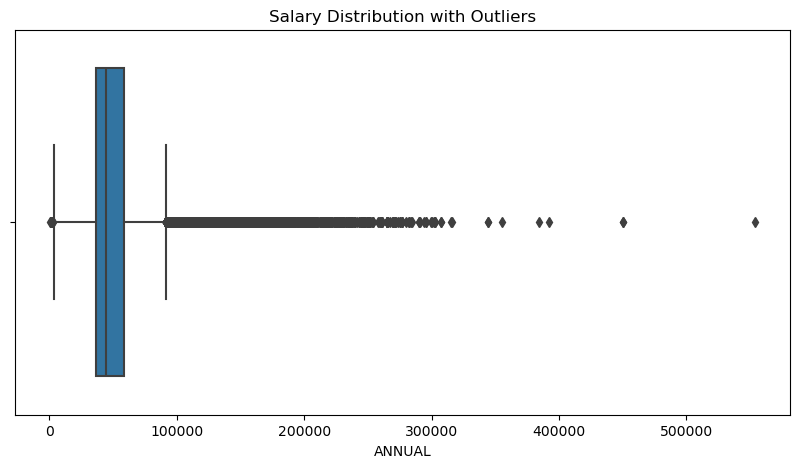

Outlier Salaries:
                                              CLASS TITLE     ANNUAL
83851   CHIEF SCIENTIFIC OFFICER                      ...  553500.00
14793   CHIEF INVESTMENT OFFICER                      ...  450000.00
144232  DIRECTOR OF INVESTMENTS                       ...  450000.00
15154   SENIOR MANAGING DIRECTOR                      ...  391999.92
136727  PSF CHIEF INVESTMENT OFFICER                  ...  384375.00
...                                                   ...        ...
142311  ELECTED OFFICIALS STAFF                       ...    1200.00
142114  ELECTED OFFICIALS STAFF                       ...    1200.00
141394  LEG. SERVICE/MAINTENANCE                      ...    1039.92
141415  LEG. SERVICE/MAINTENANCE                      ...    1039.92
142067  ELECTED OFFICIALS STAFF                       ...     600.00

[9031 rows x 2 columns]


In [179]:
# Load dataset
data_demo = pd.read_csv("salary.csv")  

# Detect outliers using Interquartile Range (IQR)
Q1 = data_demo["ANNUAL"].quantile(0.25)
Q3 = data_demo["ANNUAL"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_demo[(data_demo["ANNUAL"] < lower_bound) | (data_demo["ANNUAL"] > upper_bound)]

# Plot salary distribution with outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=data_demo["ANNUAL"])
plt.title("Salary Distribution with Outliers")
plt.show()

# Display outliers
print("Outlier Salaries:")
print(outliers[["CLASS TITLE", "ANNUAL"]].sort_values(by="ANNUAL", ascending=False))

### Who are the outliers in the salaries?
* The outliers in salaries are employees whose annual compensation significantly deviates from the central distribution, as identified by statistical methods like the Interquartile Range (IQR).
* <b>Low Salary Outliers:</b> $16,857.24, $12,480.00, $11,959.92, etc. These are likely associated with:<br>
 Part-time roles.<br>
 Temporary or contractual positions.<br>
 Limited hours worked per week.<br>
 * Low salaries from part-time or temporary roles can pull down the average and impact the predictions of certain models.
* <b>High Salary Outliers:-</b><br>
 Senior managerial or executive roles.<br>
 Employees with combined multiple job positions.<br>
* High salaries from senior positions or combined jobs create a skew in the data, affecting overall salary distribution and potentially biasing predictions.

---
## ● What departments/roles have the biggest wage disparities between managers and employees?

In [137]:
# Identify managers based on job title
data_demo['is_manager'] = data_demo['CLASS TITLE'].str.contains('Manager', case=False, na=False)

# Calculate average salaries for managers and employees by department
avg_salaries = data_demo.groupby(['AGENCY NAME', 'is_manager'])['ANNUAL'].mean().unstack()

# Calculate wage disparity
avg_salaries['Wage Disparity'] = avg_salaries[True] - avg_salaries[False]

# Sort by wage disparity
result = avg_salaries.sort_values(by='Wage Disparity', ascending=False)

# Display top 10 departments with the biggest wage disparities
print(result[['Wage Disparity']].head(10))

is_manager                                          Wage Disparity
AGENCY NAME                                                       
CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS    100849.848750
DEPARTMENT OF HOUSING AND COMMUNITY AFFAIRS           86748.302466
TEACHER RETIREMENT SYSTEM                             86409.883799
EMPLOYEES RETIREMENT SYSTEM                           79324.465977
TEXAS EDUCATION AGENCY                                56890.623813
STATE PRESERVATION BOARD                              49364.980364
STATE AUDITOR'S OFFICE                                46573.708118
TEXAS BOARD OF PROFESSIONAL ENGINEERS                 45520.844444
SECRETARY OF STATE                                    43694.454972
LEGISLATIVE BUDGET BOARD                              41608.675918


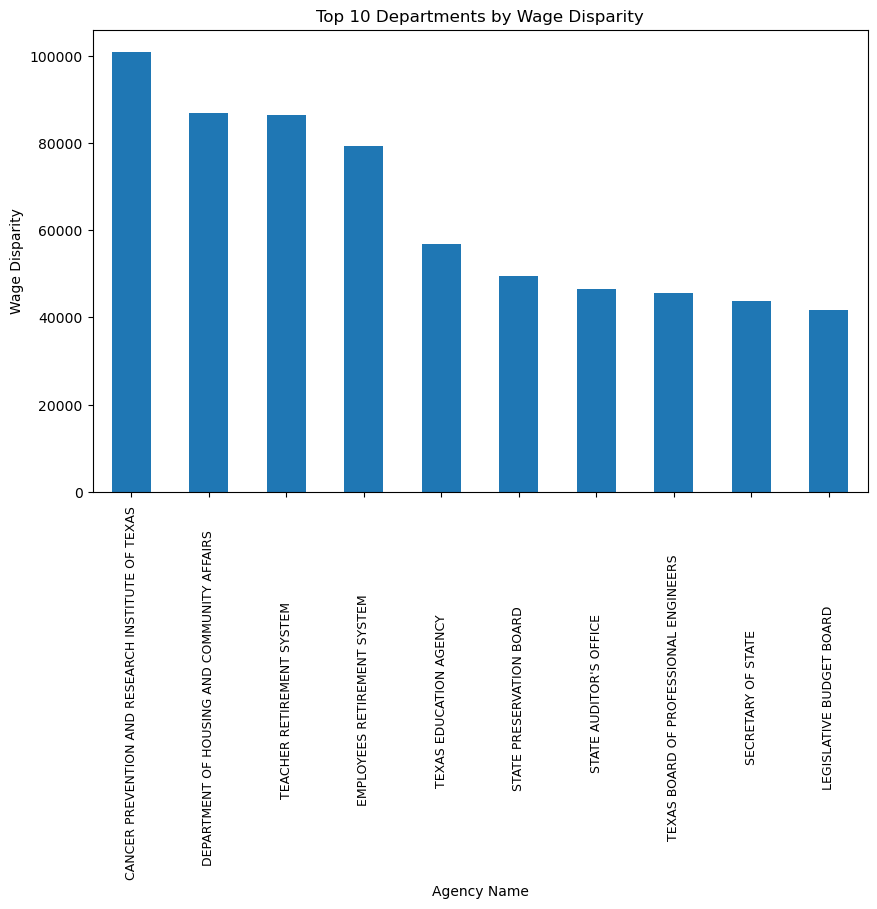

In [148]:
# Plot top departments by wage disparity
top_disparities = result['Wage Disparity'].head(10)
top_disparities.plot(kind='bar', figsize=(10, 6), title="Top 10 Departments by Wage Disparity")
plt.ylabel('Wage Disparity')
plt.xlabel('Agency Name')
plt.xticks(rotation=90,fontsize=9)
plt.show()

* **The chart shows that the Cancer Prevention and Research Institute of Texas has the highest wage disparity between managers and employees. Other departments like the Department of Housing and Community Affairs also have notable gaps. Some agencies such as the State Auditor's Office show moderate disparities, while others, like the Legislative Budget Board, have smaller wage differences.**
* **Larger disparities could reflect higher managerial responsibilities or specialized expertise required. Departments with smaller gaps may offer more balanced compensation across roles.**

## ● Have salaries and total compensations for some roles/ departments/ head-count changed over time?

In [142]:
# Ensure 'Employ Date' is in datetime format and extract the year
data_demo['EMPLOY DATE'] = pd.to_datetime(data['EMPLOY DATE'])
data_demo['Year'] = data_demo['EMPLOY DATE'].dt.year

# Calculate total salary, average salary, and headcount by year and department
salary_trends = data_demo.groupby(['Year', 'AGENCY NAME'])['ANNUAL'].sum()
avg_salary_trends = data_demo.groupby(['Year', 'AGENCY NAME'])['ANNUAL'].mean()

# Display results
print("Total Salary Trends by Department:\n", salary_trends)
print("\nAverage Salary Trends by Department:\n", avg_salary_trends)

Total Salary Trends by Department:
 Year  AGENCY NAME                                       
1975  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION     114549.84
1976  COMPTROLLER OF PUBLIC ACCOUNTS                        226313.16
      COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION     114549.84
      TEXAS LEGISLATIVE COUNCIL                              95000.04
1977  COMPTROLLER OF PUBLIC ACCOUNTS                         65709.00
                                                              ...    
2069  TEXAS DEPARTMENT OF CRIMINAL JUSTICE                   48404.88
2071  DEPARTMENT OF PUBLIC SAFETY                            86494.92
2072  TEXAS DEPARTMENT OF TRANSPORTATION                     40661.28
2073  HOUSE OF REPRESENTATIVES                                7200.00
      TEXAS DEPARTMENT OF TRANSPORTATION                     68796.00
Name: ANNUAL, Length: 2366, dtype: float64

Average Salary Trends by Department:
 Year  AGENCY NAME                                      

* **Salaries in departments like the Comptroller of Public Accounts have changed a lot with big increases in some years and drops in others. Some departments, like the Texas Legislative Council, have kept their salaries higher over time. In other departments such as the Texas Department of Criminal Justice have had lower salaries that stayed about the same. The Department of Public Safety has seen gradual salary increases. These changes in salary might be linked to how many people are hired or the department’s budget. Overall, salaries and compensation have increased in some places and stayed the same or dropped in others.**